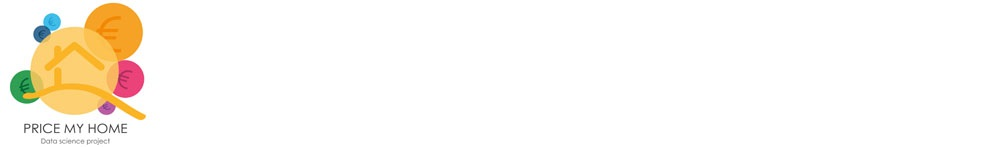

> ### <font color= "1F284B" >**API GOOGLE**</font><font color= "3B4D90" >_Sacar datos que necesitamos para el dataset.</font>

<font color= "1F284B" >- Sacar distancias al centro, latitud y longitud.</font>

##### <font color= "1F284B" >PASO 0. IMPORTAR LIBRERÍAS</font>

In [1]:
import pandas as pd
import googlemaps
from geopy.geocoders import Nominatim
import folium
import numpy as np

##### <font color= "1F284B" >PASO 1. SACAR LONGITUD Y LATITUD</font>

In [2]:
Barrios =["Palacio", "Embajadores", "Cortes", "Justicia", "Universidad", "Sol",
"Imperial", "Las Acacias", "La Chopera", "Legazpi", "Delicias", "Palos de Moguer", "Atocha",
"Pacífico", "Adelfas", "Estrella", "Ibiza", "Jerónimos", "Niño Jesús",
"Recoletos", "Goya", "Fuente del Berro","Guindalera","Lista","Castellana",
"El Viso","Prosperidad","Ciudad Jardín","Hispanoamérica","Nueva España","Castilla",
"Bellas Vistas", "Cuatro Caminos", "Castillejos","Almenara","Valdeacederas", "Berruguete",
"Gaztambide", "Arapiles", "Trafalgar", "Almagro", "Ríos Rosas", "Vallehermoso",
"El Pardo", "Fuentelarreina", "Peña Grande", "El Pilar", "La Paz", "Valverde", "Mirasierra", "El Goloso",
"Casa de Campo", "Argüelles", "Ciudad Universitaria", "Valdezarza", "Valdemarín", "El Plantío", "Aravaca",
"Los Cármenes", "Puerta del Angel", "Lucero", "Aluche", "Campamento", "Cuatro Vientos","Las Aguilas",
"Comillas, Carabanchel", "Opañel", "San Isidro", "Vista Alegre", "Puerta Bonita", "Buenavista", "Abrantes",
"Orcasitas","Orcasur","San Fermín","Almendrales","Moscardó","Zofío","Pradolongo",
"Entrevías","San Diego","Palomeras Bajas","Palomeras Sureste","Portazgo","Numancia",
"Pavones","Horcajo","Marroquina","Media Legua","Fontarrón","Vinateros",
"Ventas","Pueblo Nuevo","Quintana","Concepción","San Pascual","San Juan Bautista","Colina","Atalaya","Costillares",
"Palomas","Piovera","Canillas","Pinar del Rey","Apostol Santiago","Valdefuentes",
"San Andrés","San Cristobal","Butarque","Los Rosales","Los Angeles",
"Casco Histórico de Vallecas","Santa Eugenia","Ensanche de Vallecas",
"Casco Histórico de Vicálvaro","Valdebernardo","Valderrivas","El Cañaveral",
"Simancas","Hellín","Amposta","Arcos","Rosas","Rejas","Canillejas","El Salvador",
"Alameda de Osuna","Aeropuerto","Casco Histórico de Barajas","Timón","Corralejos"]

In [3]:
df_barrios = pd.DataFrame()

In [4]:
df_barrios["barrio"] = Barrios

In [5]:
df_barrios

,barrio
0,Palacio
1,Embajadores
2,Cortes
3,Justicia
4,Universidad
...,...
126,Alameda de Osuna
127,Aeropuerto
128,Casco Histórico de Barajas
129,Timón


In [6]:
geolocator = Nominatim(user_agent="foursquare_agent")

In [7]:
lista_latitudes = []
lista_longitudes = []

for i in df_barrios["barrio"]:
    address = i +", Madrid"
    geolocator = Nominatim(user_agent="foursquare_agent")
    
    try:
        location = geolocator.geocode(address)
        latitude = location[1][0]
        lista_latitudes.append(latitude)
        longitude = location[1][1]
        lista_longitudes.append(longitude)
    except: 
        lista_latitudes.append("nan")
        lista_longitudes.append("nan")

In [8]:
df_barrios["Latitud"] = lista_latitudes
df_barrios["Longitud"] = lista_longitudes

<font color= "1F284B" >- Cambiamos los nans por los valores reales.</font>

In [10]:
df_barrios[df_barrios["Latitud"] == "nan"]

,barrio,Latitud,Longitud
116,Valderrivas,nan,nan
128,Casco Histórico de Barajas,nan,nan


In [11]:
df_barrios.loc[116,:] = ["Valderrivas", 40.2333, -3.4333]

In [19]:
df_barrios.loc[128,:] = ["Casco Histórico de Barajas", 40.473611, -3.577222]

<font color= "1F284B" >- Cambiamos valores que no corresponden con los barrios.</font>

In [27]:
df_barrios.loc[67,:] = ["San Isidro", 40.398889, -3.726389]
df_barrios.loc[130,:] = ["Corralejos", 40.464444, -3.59]
df_barrios.loc[70,:] = ["Buenavista", 40.366667, -3.755]
df_barrios.loc[45,:] = ["Peña Grande", 40.478056, -3.725556]
df_barrios.loc[106,:] = ["San Andrés", 40.347778, -3.71667]

In [28]:
df_barrios

,barrio,Latitud,Longitud
0,Palacio,40.4151,-3.71562
1,Embajadores,40.4097,-3.70164
2,Cortes,40.4143,-3.69853
3,Justicia,40.424,-3.69575
4,Universidad,40.4253,-3.70663
...,...,...,...
126,Alameda de Osuna,40.4576,-3.58797
127,Aeropuerto,40.4948,-3.57408
128,Casco Histórico de Barajas,40.4736,-3.57722
129,Timón,40.3863,-3.70697


In [33]:
df_barrios.to_csv("longitud-latitud.csv",index=True)

In [32]:
df_barrios.to_excel("longitud-latitud.xlsx",index=True)

##### <font color= "1F284B" >PASO 2. MOSTRAR LOS BARRIOS POR PINES</font>

In [30]:
lat_madrid = 40.4167
long_madrid = -3.70325
mapa_madrid = folium.Map(location=[lat_madrid, long_madrid], zoom_start = 11)

In [31]:
for lat, lng, label in zip(df_barrios.Latitud, df_barrios.Longitud, df_barrios.barrio):
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        color = 'blue',
        popup = label,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
        ).add_to(mapa_madrid)
mapa_madrid

##### <font color= "1F284B" >PASO 3. MATRIZ DE DISTANCIAS</font>

In [34]:
from geopy import distance

In [35]:
matriz_distancia = pd.DataFrame(columns = df_barrios["barrio"].values, index=df_barrios["barrio"].values)
matriz_distancia.head()

,Palacio,Embajadores,Cortes,Justicia,Universidad,Sol,Imperial,Las Acacias,La Chopera,Legazpi,...,Arcos,Rosas,Rejas,Canillejas,El Salvador,Alameda de Osuna,Aeropuerto,Casco Histórico de Barajas,Timón,Corralejos
Palacio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embajadores,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cortes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Justicia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Universidad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for index,i in zip(df_barrios["barrio"],df_barrios[["Latitud","Longitud"]].values):
    for column,j in zip(df_barrios["barrio"],df_barrios[["Latitud","Longitud"]].values):

        dist = distance.geodesic(i, j).km
        matriz_distancia.at[index, column]=dist
    print(index)

In [37]:
matriz_distancia

,Palacio,Embajadores,Cortes,Justicia,Universidad,Sol,Imperial,Las Acacias,La Chopera,Legazpi,...,Arcos,Rosas,Rejas,Canillejas,El Salvador,Alameda de Osuna,Aeropuerto,Casco Histórico de Barajas,Timón,Corralejos
Palacio,0,1.33146,1.45335,1.9506,1.36381,1.04902,0.922013,1.75559,2.62182,3.17559,...,8.27472,10.4512,12.7962,9.77059,8.10319,11.8117,14.9159,13.4174,3.28026,11.9824
Embajadores,1.33146,0,0.581954,1.66242,1.78641,0.821903,1.36539,1.08983,1.65026,2.12705,...,7.1725,9.397,11.834,8.94446,7.32793,11.0145,14.3706,12.7212,2.63124,11.2566
Cortes,1.45335,0.581954,0,1.09278,1.39822,0.510682,1.7956,1.67145,2.16259,2.58903,...,6.83783,9.03319,11.423,8.47463,6.83823,10.5372,13.8317,12.2153,3.19191,10.7577
Justicia,1.9506,1.66242,1.09278,0,0.935669,1.01865,2.63217,2.74718,3.24475,3.64086,...,6.57273,8.67096,10.9298,7.84784,6.17028,9.87664,12.9787,11.4673,4.28466,10.0348
Universidad,1.36381,1.78641,1.39822,0.935669,0,0.966216,2.23377,2.72644,3.42836,3.91323,...,7.50353,9.58571,11.8076,8.68104,6.99225,10.6857,13.6383,12.218,4.32774,10.8067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Alameda de Osuna,11.8117,11.0145,10.5372,9.87664,10.6857,10.7898,12.3328,11.9087,11.7625,11.7118,...,4.82887,3.24293,2.15913,2.0776,3.70859,0,4.30165,1.99999,12.8286,0.781172
Aeropuerto,14.9159,14.3706,13.8317,12.9787,13.6383,13.9751,15.5866,15.3713,15.3869,15.4301,...,9.037,7.53004,5.64868,6.02816,7.2534,4.30165,0,2.37217,16.501,3.63504
Casco Histórico de Barajas,13.4174,12.7212,12.2153,11.4673,12.218,12.4234,14.0042,13.6631,13.58,13.5647,...,6.82301,5.17916,3.34123,3.9421,5.40933,1.99999,2.37217,0,14.6677,1.48678
Timón,3.28026,2.63124,3.19191,4.28466,4.32774,3.41176,2.4495,1.60138,1.13285,1.13536,...,8.43789,10.7003,13.3021,10.7597,9.28001,12.8286,16.501,14.6677,0,13.1818


In [38]:
matriz_distancia.to_csv("matriz_distancia.csv",index=True)

In [39]:
matriz_distancia.to_excel("matriz_distancia.xlsx",index=True)